<a href="https://colab.research.google.com/github/Hands-On-Fraud-Analytics/Chapter-19-Fraud-Detection-Excellence-A-Deep-Exploration/blob/main/Chapter_19_Fraud_Detection_Excellence_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Lab: Predicting the Health Insurance Cost using AutoGluon**

## **CODING TASK #1: IMPORT LIBRARIES AND DATASETS**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Installing Important Packages**

In [ ]:
# For Autogluon to work in Google Colab, you need to install ipykernel and restart the notebook
# The IPython kernel is the Python execution backend for Jupyter
!pip install -U ipykernel

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon --no-cache-dir

In [ ]:
# pip install autogluon autogluon.tabular "mxnet<2.0.0"

In [ ]:
# AutoGluon is modularized into sub-modules for: 1. Tabular, 2. text, 3.Images
from autogluon.tabular import TabularDataset, TabularPredictor

In [2]:
insurance_df = pd.read_csv('insurance.csv')

In [ ]:
insurance_df

PRACTICE OPPORTUNITY #1 [OPTIONAL]:

How many unique regions do we have in the insurance_df DataFrame?

## **CODING TASK #2: PERFORM EXPLORATORY DATA ANALYSIS**

In [ ]:
# Explore the first five rows in the DataFrame
insurance_df.head(3)

In [ ]:
# Explore the last five rows in the DataFrame
insurance_df.tail()

In [ ]:
# Generate statistical summary
insurance_df.describe()

In [ ]:
# Obtain dataset information
insurance_df.info()

In [ ]:
# Grouping by region to see any relationship between region and charges
# Seems like south east region has the highest charges and body mass index
df_region = insurance_df.groupby(by='region').mean()
df_region

**PRACTICE OPPORTUNITY #2 [OPTIONAL]:**

- **Group data by 'age' and examine the relationship between 'age' and 'charges'**

## **CODING TASK #3: PERFORM DATA VISUALIZATION**

In [ ]:
# check if there are any Null values
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [ ]:
# check if there are any Null values
insurance_df.isnull().sum()

In [ ]:
insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(bins = 30, figsize = (12, 12), color = 'r');


In [ ]:
# plot pairplot
sns.pairplot(insurance_df)

In [ ]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show()


In [ ]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)
plt.show()


**PRACTICE OPPORTUNITY #3 [OPTIONAL]**:

- **Calculate and plot the correlation matrix**
- **Which feature has the most positive correlation with charges?**

## **CODING TASK #4: TRAIN MULTIPLE MODELS USING AUTOGLUON**

In [ ]:
# Split the data into 80% for training and 20% for testing using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(insurance_df, test_size=0.2, random_state=0)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
# Train multiple ML regression models using AutoGluon
# You need to specify the target column, train_data, limit_time, and presets
# Note that AutoGluon automatically detects if the problem is classification or regression type problems from the 'label' column
# For regression type problems, 'label' values are generally floating point non-integers with large number of unique values

predictor = TabularPredictor(label="charges", problem_type = 'regression', eval_metric = 'r2').fit(train_data = X_train, time_limit = 200, presets = "best_quality")

In [ ]:
predictor.fit_summary()

## **CODING TASK #5: EVALUATE TRAINED MODELS PERFORMANCE**

In [ ]:
predictor.leaderboard()

In [ ]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (R2)", xlabel = "Regression Models")
plt.xticks(rotation = 45);

In [ ]:
predictor.evaluate(X_test)

In [ ]:
# assess model performance
# Pick 5 test datasets and generate predictions
y_pred = predictor.predict(X_test)
print("Predictions:  ", list(y_pred)[:5])

In [ ]:
X_test

In [ ]:
y_test = X_test['charges']
y_test #groundtruth

In [ ]:
y_predict = predictor.predict(X_test)
plt.figure(figsize = (15, 10))
plt.plot(y_test, y_predict, "^", color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True Values')

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2)

**PRACTICE OPPORTUNITY #4 [OPTIONAL]:**

- **Retrain a regressor model using AutoGluon with different preset value**
- **Set the limit_time to 300 secs**
- **Use RMSE as the key metric and plot the barchart**
- **Which model provides the best performance?**
- **Assess trained model performance by comparing various metrics**

# **PRACTICE OPPORTUNITY SOLUTIONS**

**PRACTICE OPPORTUNITY #1 SOLUTION:**

- **How many unique regions do we have in the insurance_df?**

In [ ]:
insurance_df['region'].unique()

**PRACTICE OPPORTUNITY #2 SOLUTION:**

- **Group data by 'age' and examine the relationship between 'age' and 'charges'**

In [ ]:
df_age = insurance_df.groupby(by = 'age').mean()
df_age

**PRACTICE OPPORTUNITY #3 SOLUTION:**

- **Calculate and plot the correlation matrix**
- **Which feature has the most positive correlation with charges?**

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(insurance_df.corr(), annot = True);
# smoker and age have positive correlations with charges

**PRACTICE OPPORTUNITY #4 SOLUTION:**

- **Retrain a regressor model using AutoGluon with different preset value**
- **Set the limit_time to 300 secs**
- **Use RMSE as the key metric and plot the barchart**
- **Which model provides the best performance?**
- **Assess trained model performance by comparing various metrics**

In [ ]:
predictor = TabularPredictor(label="charges", problem_type = 'regression', eval_metric = 'rmse').fit(train_data = X_train, time_limit = 300, presets = "optimize_for_deployment")
predictor.fit_summary()
predictor.leaderboard()

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (RMSE)", xlabel = "Regression Models")
plt.xticks(rotation = 45);

predictor.evaluate(X_test)

# **Final Lab Project: Fraud Detection in Insurance Claims Using AutoGluon**

## **Step 1: LOADING IMPORTANT LIBRARIES AND DATASETS**

Let's start by loading the insurance_claims.csv file and conducting an initial exploratory data analysis to understand the dataset's structure. Then, you will follow through with preprocessing and setting up the AutoGluon classifier to predict the 'fraud_reported' column.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
#from autogluon.tabular import TabularPredictor

# Load the dataset
file_path = 'insurance_claims.csv'
insurance_claims_df = pd.read_csv(file_path)

insurance_claims_df


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,7/16/1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,1/5/2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2/17/2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,11/18/2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


# **Step 2: PERFORM EXPLORATORY DATA ANALYSIS**

In [11]:
# Display the first few rows of the dataframe
insurance_claims_df.head(3)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN


In [8]:
# Explore the last five rows in the DataFrame
insurance_claims_df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,7/16/1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,1/5/2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2/17/2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,11/18/2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11/11/1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [9]:
# Generate statistical summary
insurance_claims_df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [12]:
# Display basic information about the dataset
insurance_claims_df_info = insurance_claims_df.info()

insurance_claims_df_info, insurance_claims_df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

(None,
    months_as_customer  age  policy_number policy_bind_date policy_state  \
 0                 328   48         521585       10/17/2014           OH   
 1                 228   42         342868        6/27/2006           IN   
 2                 134   29         687698         9/6/2000           OH   
 3                 256   41         227811        5/25/1990           IL   
 4                 228   44         367455         6/6/2014           IL   
 
   policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
 0    250/500               1000                1406.91               0   
 1    250/500               2000                1197.22         5000000   
 2    100/300               2000                1413.14         5000000   
 3    250/500               2000                1415.74         6000000   
 4   500/1000               1000                1583.91         6000000   
 
    insured_zip  ... police_report_available total_claim_amount injury_claim  \
 0 

The dataset consists of 1000 entries and 41 columns. Each column represents a feature that could be relevant to insurance claims and potentially to fraud detection. However, it's noted that there is an extra column _c39 which seems to contain only NaN values. This column is likely an artifact of the data collection process and should be removed.




<Axes: >

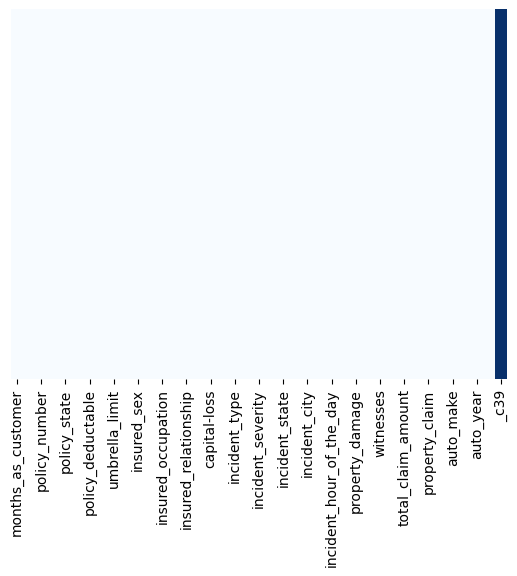

In [13]:
# check if there are any Null values
sns.heatmap(insurance_claims_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [14]:
# check if there are any Null values
insurance_claims_df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
State                             0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved 

In [ ]:
# plot pairplot
sns.pairplot(insurance_claims_df)

# **Step 3: DATA CLEANING AND PREPROCESSING**

Let's start by cleaning the data and preparing it for analysis and modeling.

In [21]:
# Data Cleaning Steps

# Remove the column with NaN values
insurance_claims_df.drop(columns=['_c39'], inplace=True)

# Replace '?' with NaN
insurance_claims_df.replace('?', pd.NA, inplace=True)

# Convert dates to datetime objects and extract year, month, and day as separate features
insurance_claims_df['policy_bind_date'] = pd.to_datetime(insurance_claims_df['policy_bind_date'])
insurance_claims_df['incident_date'] = pd.to_datetime(insurance_claims_df['incident_date'])

# Extracting year, month, and day from policy_bind_date
insurance_claims_df['policy_bind_year'] = insurance_claims_df['policy_bind_date'].dt.year
insurance_claims_df['policy_bind_month'] = insurance_claims_df['policy_bind_date'].dt.month
insurance_claims_df['policy_bind_day'] = insurance_claims_df['policy_bind_date'].dt.day

# Extracting year, month, and day from incident_date
insurance_claims_df['incident_year'] = insurance_claims_df['incident_date'].dt.year
insurance_claims_df['incident_month'] = insurance_claims_df['incident_date'].dt.month
insurance_claims_df['incident_day'] = insurance_claims_df['incident_date'].dt.day

# Removing the original date columns as we have extracted the information needed
insurance_claims_df.drop(columns=['policy_bind_date', 'incident_date'], inplace=True)

# Visualize the distribution of the target variable 'fraud_reported'
fraud_distribution = insurance_claims_df['fraud_reported'].value_counts(normalize=True)

# Checking for missing values after replacements
missing_values = insurance_claims_df.isna().sum()

fraud_distribution, missing_values


(N    0.753
 Y    0.247
 Name: fraud_reported, dtype: float64,
 months_as_customer               0
 age                              0
 policy_number                    0
 policy_state                     0
 policy_csl                       0
 policy_deductable                0
 policy_annual_premium            0
 umbrella_limit                   0
 insured_zip                      0
 insured_sex                      0
 insured_education_level          0
 insured_occupation               0
 insured_hobbies                  0
 insured_relationship             0
 capital-gains                    0
 capital-loss                     0
 incident_type                    0
 collision_type                 178
 incident_severity                0
 authorities_contacted            0
 incident_state                   0
 State                            0
 incident_city                    0
 incident_location                0
 incident_hour_of_the_day         0
 number_of_vehicles_involved      0
 

The target variable **fraud_reported** is indeed imbalanced, with 75.3% of the cases being non-fraudulent ('N') and 24.7% being fraudulent ('Y'). This imbalance will be important to consider when training and evaluating the model.

In terms of missing values, the columns **collision_type, property_damage**, and **police_report_available** have a significant number of missing entries. These missing values need to be handled before training the model. Given the number of missing values and the nature of these variables, it might be reasonable to treat them as a separate category, rather than removing the rows or trying to impute them.


# **Step 4: PREPARING DATA FOR MODELING**

Now, let's proceed to train a classifier model with AutoGluon to predict the fraud_reported column. We'll configure AutoGluon to handle the class imbalance using appropriate methods and evaluate its performance on the test set.

Next steps will include:
1.	Handling missing values by converting them to a separate category.
2.	Encoding categorical features into a format suitable for AutoGluon.
3.	Splitting the data into a training set and a test set.
4.	Training a classifier model with AutoGluon.


In [22]:

# Handling missing values by treating them as a separate category
insurance_claims_df.fillna('Unknown', inplace=True)

# Encoding categorical variables using a method that is suitable for AutoGluon
# AutoGluon can handle categorical features directly, but let's make sure there are no unsupported data types left
unsupported_object_type_columns = insurance_claims_df.select_dtypes(include=['object']).columns
insurance_claims_df[unsupported_object_type_columns] = insurance_claims_df[unsupported_object_type_columns].astype('category')

# Split the dataset into a training set and a test set
train_df, test_df = train_test_split(insurance_claims_df, test_size=0.2, random_state=42, stratify=insurance_claims_df['fraud_reported'])


######

from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(insurance_df, test_size=0.2, random_state=0)

#####

# Check if the split is successful
train_df.shape, test_df.shape


((800, 44), (200, 44))

The data has been successfully split into a training set of 800 entries and a test set of 200 entries, with categorical variables converted to a category data type which AutoGluon can handle efficiently.

# **Step 5: MODEL TRAINING AND EVALUATION WITH AUTOGLUON**

In [6]:
# Specify the directory where models and intermediate outputs should be saved
save_path = '/mnt/data/autogluon_insurance_model'

# Train multiple ML regression models using AutoGluon
# You need to specify the target column, train_data, limit_time, and presets
# Note that AutoGluon automatically detects if the problem is classification or regression type problems from the 'label' column
# For regression type problems, 'label' values are generally floating point non-integers with large number of unique values

# Initialize the TabularPredictor
predictor = TabularPredictor(label='fraud_reported', path=save_path, eval_metric='accuracy')

#predictor = TabularPredictor(label="fraud_reported", problem_type = 'classification', eval_metric = 'accuracy').fit(train_data = train_df, time_limit = 200, presets = "best_quality")
#Optional Method to choose between#

# Train the predictor with the training data
predictor.fit(train_data=train_df, time_limit=200, presets='best_quality')

# Evaluate the performance on the test data
performance = predictor.evaluate(test_df)

# Get the leaderboard of models trained by AutoGluon
leaderboard = predictor.leaderboard(test_df, silent=True)

performance, leaderboard

predictor.fit_summary()

Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/mnt/data/autogluon_insurance_model/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Aug 30 11:19:59 UTC 2023
Disk Space Avail:   81.84 GB / 115.66 GB (70.8%)
Train Data Rows:    800
Train Data Columns: 43
Label Column: fraud_reported
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  ['N', 'Y']
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = Y, class 0 = N
	Note: For your binary classification, Au

({'accuracy': 0.84,
  'balanced_accuracy': 0.8113258548452493,
  'mcc': 0.5932342981214828,
  'roc_auc': 0.8533585619678334,
  'f1': 0.6981132075471698,
  'precision': 0.6491228070175439,
  'recall': 0.7551020408163265},
                       model  score_test  score_val  pred_time_test  \
 0           CatBoost_BAG_L1       0.840    0.88125        0.083568   
 1       WeightedEnsemble_L2       0.840    0.88125        0.088124   
 2            XGBoost_BAG_L1       0.820    0.85625        0.363417   
 3     NeuralNetTorch_BAG_L1       0.815    0.81125        0.399451   
 4   RandomForestGini_BAG_L1       0.785    0.77500        0.184210   
 5     ExtraTreesEntr_BAG_L1       0.780    0.76250        0.167061   
 6   RandomForestEntr_BAG_L1       0.780    0.77250        0.181796   
 7      LightGBMLarge_BAG_L1       0.780    0.82000        0.396095   
 8           LightGBM_BAG_L1       0.775    0.83250        0.336156   
 9         LightGBMXT_BAG_L1       0.775    0.81750        2.614723  

**The two methods shown above are for initializing and using the TabularPredictor from AutoGluon, but they differ slightly in their setup and usage.**

# **Comparison and Which is Better:**

**Explicit vs. Implicit Problem Type Specification:**

- In Method 1, the problem type (classification or regression) is inferred by AutoGluon based on the data type of the label column.

- Method 2 explicitly specifies it as 'classification'. Explicit specification can be helpful for clarity or in cases where the automatic inference might not align with your intentions.

**Training Approach:**

- Method 1 separates the initialization of the predictor from the training process, which could be useful if you need to perform some operations between these two steps.

- Method 2 combines initialization and training into one step, which is more concise and straightforward if no intermediate processing is required.

**Configurability:**

Method 2 allows you to immediately specify training parameters like time_limit and presets, which can be convenient for quick setups.


**Which to Choose?**

**The choice between these methods depends on your specific needs:**

- If you prefer a clear separation of predictor initialization and training, or if you need to perform operations between these steps, Method 1 might be better.
- If you want a more concise setup where you can immediately train the predictor with specific parameters, Method 2 is preferable.

Both methods are correct and can be used effectively depending on the context of your project and your coding style preferences. The "best" method is the one that aligns well with your workflow and requirements for the task at hand.